# Task 6 - Задание на кластеризацию

По данной ссылке доступны датасеты для выполнения задания.

📂 https://disk.yandex.ru/d/6BtJviqr61w0YA

Можно выполнять на любом или на двух сразу.

##Описания датасетов

**Mall customer** - покупатели универмага

	•	CustomerID – Уникальный идентификатор, присвоенный клиенту
	•	Gender – Пол клиента
	•	Age – Возраст клиента
	•	Annual Income (k$) – Годовой доход клиента (в тысячах долларов)
	•	Spending Score (1-100) – Оценка, присвоенная торговым центром на основе поведения клиента и его привычек тратить деньги

**Credit Card Customer** клиенты банка (продукт кредитных карт)

	•	Customer Serial Identification Number – Серийный идентификационный номер клиента: используется для индексации значений
	•	Customer Key – Ключ клиента
	•	Avg_Credit_Limit – Средний кредитный лимит клиента
	•	Total_Credit_Cards – Общее количество кредитных карт, принадлежащих клиенту
	•	Total_visits_bank – Общее количество посещений банка клиентом
	•	Total_visits_online – Общее количество онлайн-визитов клиента в банк
	•	Total_calls_made – Общее количество звонков клиента в банк

🏁 **Задание: выполнить сегментацию клиентов (с помощью любых двух алгоритмов кластеризации)**. Дайте названия вашим кластерам (метки)

Оценка:

- $3$ балла - выполнена только кластеризация на датасете Mall customer
- $5$ баллов - выполнена только кластеризация на датасете Credit Card Customer
- $10$ баллов - выполнена кластеризация на обоих датасетах

- $+2$ балла за каждый дополнительный метод кластеризации
- $-2$ балла если при работе с датасетом использовался только один метод

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans 

In [17]:
# ваш код здесь
credit_card = pd.read_csv('Credit_Card_Customer_Data.csv')
mall_customer = pd.read_csv('Mall_Customers.csv')


In [18]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [20]:
mall_customer1 = mall_customer[['Annual Income (k$)','Spending Score (1-100)']]

In [21]:
from sklearn.preprocessing import StandardScaler
 


In [65]:
model = KMeans(n_clusters=4, init='k-means++', n_init='auto', random_state=1, verbose=1)

Initialization complete
Iteration 0, inertia 287118.0.
Iteration 1, inertia 270408.56.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 218334.0.
Iteration 1, inertia 187656.062202099.
Iteration 2, inertia 186786.02666271664.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 178254.0.
Iteration 1, inertia 156558.30117741114.
Iteration 2, inertia 155492.2644887144.
Iteration 3, inertia 155390.5815390715.
Iteration 4, inertia 155265.24987903895.
Iteration 5, inertia 155228.85960075835.
Iteration 6, inertia 155124.2240641357.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 89878.0.
Iteration 1, inertia 74675.67707361846.
Iteration 2, inertia 74306.37703871222.
Iteration 3, inertia 74187.92546719602.
Iteration 4, inertia 74167.60614016867.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 60834.0.
Iteration 1, inertia 44806.3

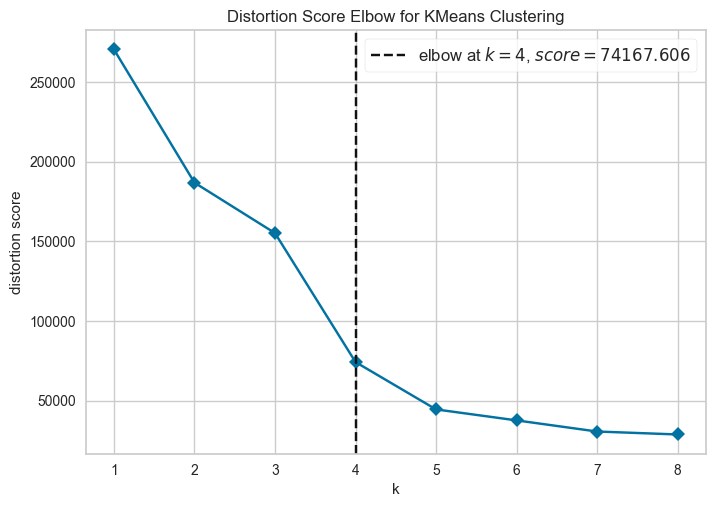

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,9), timings=False)

visualizer.fit(mall_customer1)
visualizer.show()

In [32]:
model = KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state=1, verbose=1)

In [33]:
model.fit(mall_customer1)

Initialization complete
Iteration 0, inertia 60789.0.
Iteration 1, inertia 44791.66054558927.
Iteration 2, inertia 44475.22082662438.
Iteration 3, inertia 44451.3443368226.
Converged at iteration 3: strict convergence.


KMeans(n_clusters=5, random_state=1, verbose=1)

In [34]:
labels = model.predict(mall_customer1)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [35]:
model.cluster_centers_

array([[5.52962963e+01, 4.95185185e+01, 3.70370370e-02],
       [8.82000000e+01, 1.71142857e+01, 1.00000000e+00],
       [2.57272727e+01, 7.93636364e+01, 2.00000000e+00],
       [8.65384615e+01, 8.21282051e+01, 3.00000000e+00],
       [2.63043478e+01, 2.09130435e+01, 0.00000000e+00]])

In [36]:
lables = model.predict(mall_customer1)
mall_customer1['claster'] = lables

/var/folders/7k/0hthbbf925j5rmfcysr3jss40000gn/T/ipykernel_98797/1518711784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall_customer1['claster'] = lables


In [37]:
mall_customer1

,Annual Income (k$),Spending Score (1-100),claster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


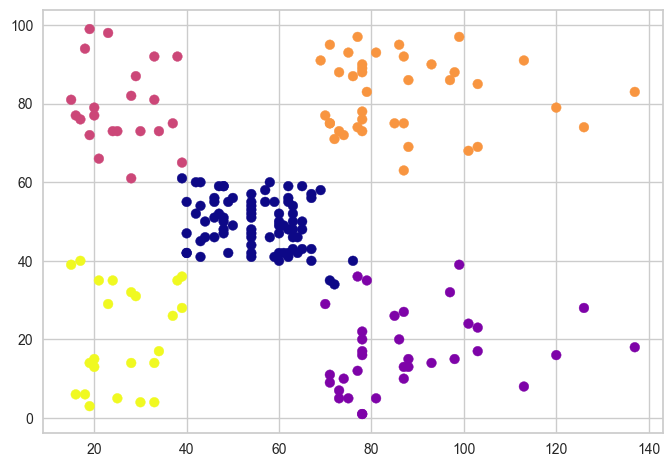

In [38]:
plt.scatter(mall_customer1['Annual Income (k$)'], mall_customer1['Spending Score (1-100)'], c = labels , cmap = "plasma")
plt.show()

# Алгоритм DBSCAN

In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

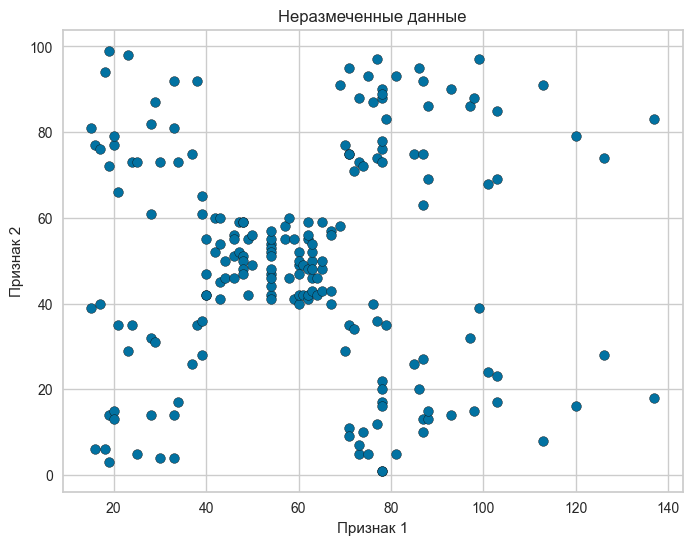

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(mall_customer1[['Annual Income (k$)']], mall_customer1[['Spending Score (1-100)']], edgecolors='k')
plt.title("Неразмеченные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [42]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward') # single , complete, average
labels = model.fit_predict(mall_customer1)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


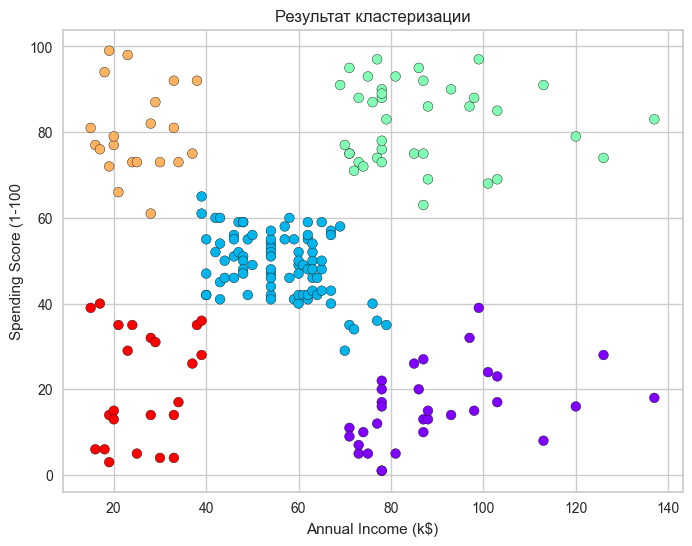

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(mall_customer1[['Annual Income (k$)']], mall_customer1[['Spending Score (1-100)']], c=labels, cmap='rainbow', edgecolors='k')
plt.title("Результат кластеризации")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

# **Credit Card Customer** 
клиенты банка (продукт кредитных карт)


In [45]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [46]:
credit_card.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [47]:
credit_card['request'] = credit_card['Total_visits_bank'] + credit_card['Total_visits_online'] + credit_card['Total_calls_made'] + credit_card['Total_Credit_Cards']


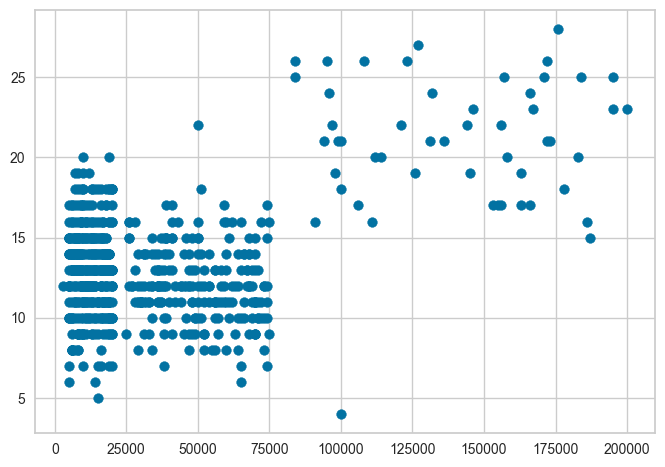

In [48]:
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']])

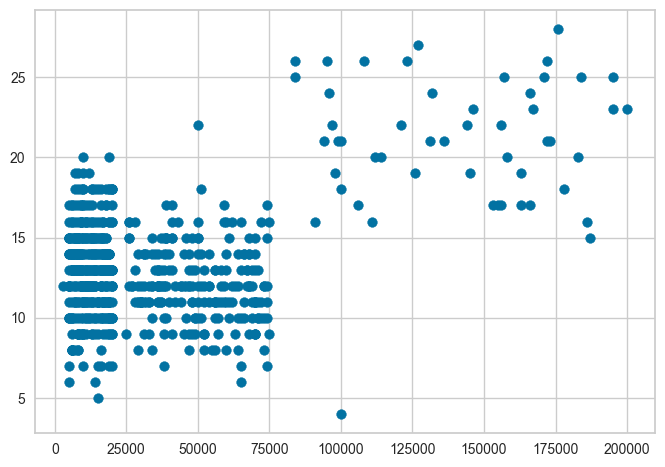

In [49]:
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']])

In [50]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=1, verbose=1)

Initialization complete
Iteration 0, inertia 1603122062595.0.
Iteration 1, inertia 1365775148837.0986.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 831215465443.0.
Iteration 1, inertia 764296352818.9164.
Iteration 2, inertia 760934070903.9352.
Iteration 3, inertia 760488782710.9912.
Iteration 4, inertia 760389645152.276.
Iteration 5, inertia 760354128050.8757.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 673773843876.0.
Iteration 1, inertia 520652213191.20557.
Iteration 2, inertia 497440405383.13135.
Iteration 3, inertia 489401116516.68427.
Iteration 4, inertia 484675181321.9184.
Iteration 5, inertia 476070692625.8491.
Iteration 6, inertia 461124665797.0224.
Iteration 7, inertia 454004964892.3838.
Iteration 8, inertia 453783285975.3806.
Converged at iteration 8: center shift 25289.200306128005 within tolerance 25866.9535764602.
Initialization complete
Iteration 0, inertia 555510578318.0.
Iterati

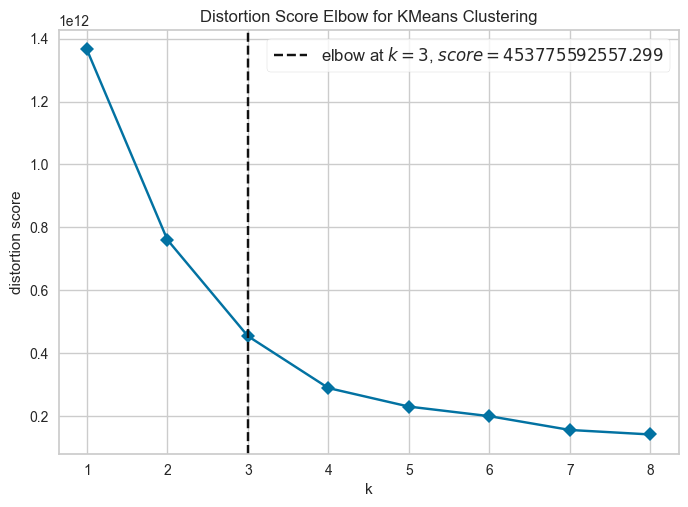

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
visualizer = KElbowVisualizer(model, k=(1,9), timings=False)

visualizer.fit(credit_card)
visualizer.show()

In [109]:
model = KMeans(n_clusters=4, init='k-means++', n_init='auto', random_state=1, verbose=1)

In [110]:
model.fit(credit_card)

Initialization complete
Iteration 0, inertia 555510578825.0.
Iteration 1, inertia 436311310770.3074.
Iteration 2, inertia 375585904053.63934.
Iteration 3, inertia 331141555281.74036.
Iteration 4, inertia 320103235847.412.
Iteration 5, inertia 307932145544.5437.
Iteration 6, inertia 296229445684.9897.
Iteration 7, inertia 290971797908.3118.
Iteration 8, inertia 289224059939.26294.
Iteration 9, inertia 288615125791.2003.
Iteration 10, inertia 288479630606.5689.
Iteration 11, inertia 288468857834.84766.
Converged at iteration 11: strict convergence.


KMeans(n_clusters=4, random_state=1, verbose=1)

In [111]:
labels = model.predict(credit_card)
labels

array([3, 3, 0, 0, 3, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2,

In [112]:
model.cluster_centers_

array([[ 2.59310345e+02,  3.27477433e+04,  1.67854406e+04,
         4.27586207e+00,  2.39463602e+00,  2.13026820e+00,
         4.08429119e+00,  1.28850575e+01, -1.33226763e-15],
       [ 6.36648649e+02,  5.69411892e+04,  1.56756757e+05,
         8.72972973e+00,  6.21621622e-01,  1.08378378e+01,
         1.00000000e+00,  2.11891892e+01,  1.00000000e+00],
       [ 2.49079812e+02,  7.80888498e+04,  1.55586854e+04,
         3.78873239e+00,  2.27230047e+00,  2.28638498e+00,
         4.49765258e+00,  1.28450704e+01,  1.93427230e+00],
       [ 4.95570470e+02,  6.11170671e+04,  6.25771812e+04,
         5.77181208e+00,  3.04697987e+00,  1.85234899e+00,
         2.04026846e+00,  1.27114094e+01,  1.25503356e+00]])

In [113]:
lables = model.predict(credit_card)
credit_card['claster'] = lables

In [114]:
credit_card


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,request,claster
0,1,87073,100000,2,1,1,0,4,3
1,2,38414,50000,3,0,10,9,22,3
2,3,17341,50000,7,1,3,4,15,0
3,4,40496,30000,5,1,1,4,11,0
4,5,47437,100000,6,0,12,3,21,3
...,...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,21,3
656,657,60732,84000,10,1,13,2,26,3
657,658,53834,145000,8,1,9,1,19,1
658,659,80655,172000,10,1,15,0,26,1


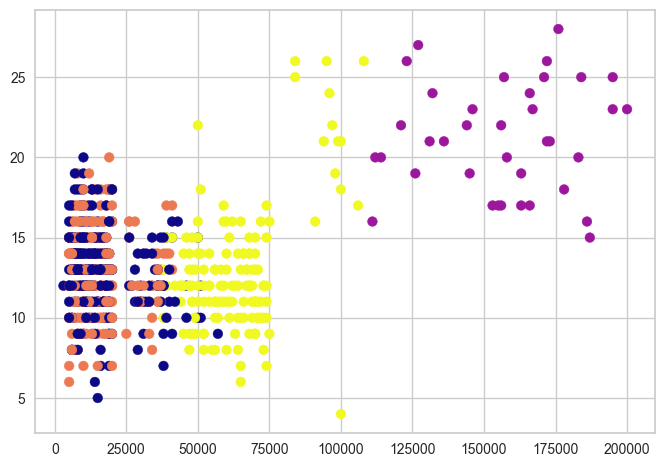

In [115]:
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']], c = labels , cmap = "plasma")
plt.show()

# DBscan

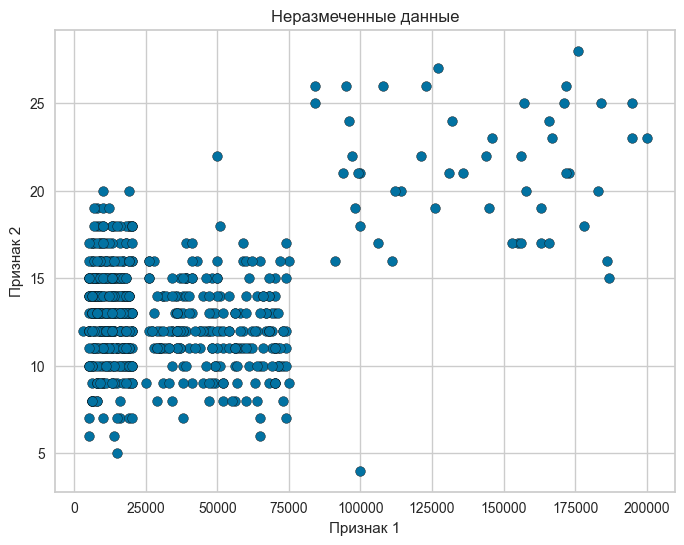

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']], edgecolors='k')
plt.title("Неразмеченные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [93]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = model.fit_predict(credit_card)
print(labels)

[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

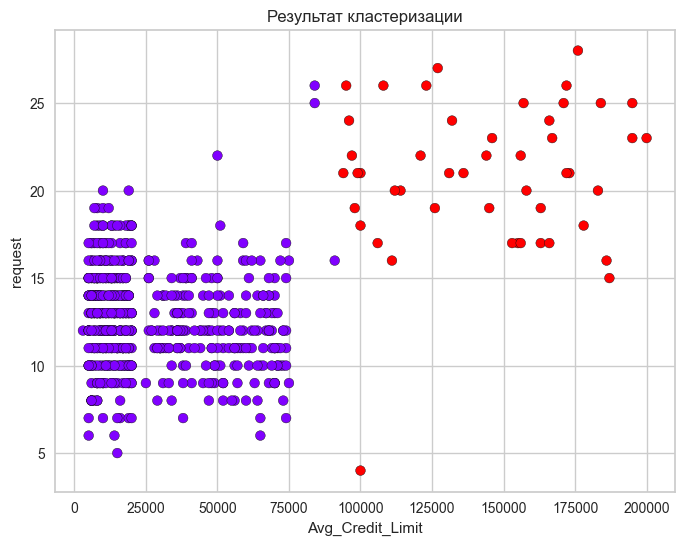

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(credit_card[['Avg_Credit_Limit']], credit_card[['request']], c=labels, cmap='rainbow', edgecolors='k')
plt.title("Результат кластеризации")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("request")
plt.show()